In [ ]:
# Carga de Librerías Necesarias:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('fivethirtyeight')

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.datasets import load_iris
from sklearn.metrics import silhouette_score

# Cargar el conjunto de datos iris
iris = load_iris()
data = iris.data

# Realizar clustering con K-means
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(data)
kmeans_score = silhouette_score(data, kmeans_labels)

# Realizar clustering jerárquico
hierarchical = AgglomerativeClustering(n_clusters=3)
hierarchical_labels = hierarchical.fit_predict(data)
hierarchical_score = silhouette_score(data, hierarchical_labels)

# Crear tabla de comparación de rendimientos
data = {
    'Algoritmo': ['K-means', 'Clustering jerárquico'],
    'Silhouette Score': [kmeans_score, hierarchical_score]
}
df = pd.DataFrame(data)
print(df)

               Algoritmo  Silhouette Score
0                K-means          0.552819
1  Clustering jerárquico          0.554324


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
# Conjunto de Datos para el Análisis:

from google.colab import files
files.upload()

Saving USA_cars_datasets.csv to USA_cars_datasets.csv


{'USA_cars_datasets.csv': b',price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition\n0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,  jtezu11f88k007763,159348797,new jersey, usa,10 days left\n1,2899,ford,se,2011,clean vehicle,190552.0,silver,  2fmdk3gc4bbb02217,166951262,tennessee, usa,6 days left\n2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,  3c4pdcgg5jt346413,167655728,georgia, usa,2 days left\n3,25000,ford,door,2014,clean vehicle,64146.0,blue,  1ftfw1et4efc23745,167753855,virginia, usa,22 hours left\n4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,  3gcpcrec2jg473991,167763266,florida, usa,22 hours left\n5,5700,dodge,mpv,2018,clean vehicle,45561.0,white,  2c4rdgeg9jr237989,167655771,texas, usa,2 days left\n6,7300,chevrolet,pk,2010,clean vehicle,149050.0,black,  1gcsksea1az121133,167753872,georgia, usa,22 hours left\n7,13350,gmc,door,2017,clean vehicle,23525.0,gray,  1gks2gkc3hr326762,167692494,california, usa,20 hours left\n8,14600,che

In [ ]:
# Creación del Data Frame con los Datos:

data_frame = pd.read_csv("USA_cars_datasets.csv", sep =',', encoding ='utf-8', decimal=",")
data_frame.head(10)

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,1,2899,ford,se,2011,clean vehicle,190552.0,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,3,25000,ford,door,2014,clean vehicle,64146.0,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left
5,5,5700,dodge,mpv,2018,clean vehicle,45561.0,white,2c4rdgeg9jr237989,167655771,texas,usa,2 days left
6,6,7300,chevrolet,pk,2010,clean vehicle,149050.0,black,1gcsksea1az121133,167753872,georgia,usa,22 hours left
7,7,13350,gmc,door,2017,clean vehicle,23525.0,gray,1gks2gkc3hr326762,167692494,california,usa,20 hours left
8,8,14600,chevrolet,malibu,2018,clean vehicle,9371.0,silver,1g1zd5st5jf191860,167763267,florida,usa,22 hours left
9,9,5250,ford,mpv,2017,clean vehicle,63418.0,black,2fmpk3j92hbc12542,167656121,texas,usa,2 days left


###**Analisis Exploratorio**

###**Mostrar cantidad de observaciones y características.**

In [ ]:
# Obtener la cantidad de observaciones y características
num_observaciones = len(data_frame)
num_caracteristicas = len(data_frame.columns)

print("Cantidad de observaciones:", num_observaciones)
print("Cantidad de características:", num_caracteristicas)


Cantidad de observaciones: 2499
Cantidad de características: 13


In [ ]:
data_frame.shape

(2499, 13)

###**Medidas estadísticas básicas de las columnas, dependiendo de su tipo.**

In [ ]:
# Obtener medidas estadísticas básicas
medidas_estadisticas = data_frame.describe(include='all')

print(medidas_estadisticas)


               price brand model         year  title_status       mileage  \
count    2499.000000  2499  2499  2499.000000   2499.000000  2.499000e+03   
unique           NaN    28   127          NaN           NaN           NaN   
top              NaN  ford  door          NaN           NaN           NaN   
freq             NaN  1235   651          NaN           NaN           NaN   
mean    18767.671469   NaN   NaN  2016.714286      0.065226  5.229869e+04   
std     12116.094936   NaN   NaN     3.442656      0.246974  5.970552e+04   
min         0.000000   NaN   NaN  1973.000000      0.000000  0.000000e+00   
25%     10200.000000   NaN   NaN  2016.000000      0.000000  2.146650e+04   
50%     16900.000000   NaN   NaN  2018.000000      0.000000  3.536500e+04   
75%     25555.500000   NaN   NaN  2019.000000      0.000000  6.347250e+04   
max     84900.000000   NaN   NaN  2020.000000      1.000000  1.017936e+06   

        color                  vin           lot         state country  \
c

###**Limpieza y transformación de datos.**

In [ ]:
# Se descarta la primera columna porque no tiene valor predictivo
data_frame1 = data_frame.drop(["Unnamed: 0"],axis=1)
data_frame1.head(15)

,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,6300,toyota,cruiser,2008,0,274117.0,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,2899,ford,se,2011,0,190552.0,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,5350,dodge,mpv,2018,0,39590.0,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,25000,ford,door,2014,0,64146.0,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,27700,chevrolet,1500,2018,0,6654.0,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left
5,5700,dodge,mpv,2018,0,45561.0,white,2c4rdgeg9jr237989,167655771,texas,usa,2 days left
6,7300,chevrolet,pk,2010,0,149050.0,black,1gcsksea1az121133,167753872,georgia,usa,22 hours left
7,13350,gmc,door,2017,0,23525.0,gray,1gks2gkc3hr326762,167692494,california,usa,20 hours left
8,14600,chevrolet,malibu,2018,0,9371.0,silver,1g1zd5st5jf191860,167763267,florida,usa,22 hours left
9,5250,ford,mpv,2017,0,63418.0,black,2fmpk3j92hbc12542,167656121,texas,usa,2 days left


In [ ]:

data_frame1.dtypes

price             int64
brand            object
model            object
year              int64
title_status      int64
mileage         float64
color            object
vin              object
lot               int64
state            object
country          object
condition        object
dtype: object

In [ ]:
# Comprobación del Tratamiento de Valores Nulos:

for feature in data_frame1.columns:
    print('Total de valores nulos de', feature, '=', data_frame1[feature].isna().sum())

Total de valores nulos de price = 0
Total de valores nulos de brand = 0
Total de valores nulos de model = 0
Total de valores nulos de year = 0
Total de valores nulos de title_status = 0
Total de valores nulos de mileage = 0
Total de valores nulos de color = 0
Total de valores nulos de vin = 0
Total de valores nulos de lot = 0
Total de valores nulos de state = 0
Total de valores nulos de country = 0
Total de valores nulos de condition = 0


In [ ]:
#tratamiebto de los valores nulos

data_frane1 = data_frame1.dropna()
data_frame1.shape

(2499, 12)

In [ ]:
data_frame1.isnull().any().any()

False

In [ ]:
#validacion tabular del conjunto de datos

data_frame1

,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,6300,toyota,cruiser,2008,0,274117.0,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,2899,ford,se,2011,0,190552.0,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,5350,dodge,mpv,2018,0,39590.0,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,25000,ford,door,2014,0,64146.0,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,27700,chevrolet,1500,2018,0,6654.0,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left
...,...,...,...,...,...,...,...,...,...,...,...,...
2494,7800,nissan,versa,2019,0,23609.0,red,3n1cn7ap9kl880319,167722715,california,usa,1 days left
2495,9200,nissan,versa,2018,0,34553.0,silver,3n1cn7ap5jl884088,167762225,florida,usa,21 hours left
2496,9200,nissan,versa,2018,0,31594.0,silver,3n1cn7ap9jl884191,167762226,florida,usa,21 hours left
2497,9200,nissan,versa,2018,0,32557.0,black,3n1cn7ap3jl883263,167762227,florida,usa,2 days left


###**Proponer al menos 3 preguntas que puedan ser respondidas a través de agrupaciones.**

###**¿Cuál es la distribución del precio de los automóviles según el color?.**

In [ ]:
# Distribución del precio de los automóviles según el color
precio_por_color = data_frame1.groupby('color')['price'].mean()
print("Distribución del precio de los automóviles según el color:")
print(precio_por_color)

Distribución del precio de los automóviles según el color:
color
beige                                      13764.000000
billet silver metallic clearcoat           18490.666667
black                                      20289.534884
black clearcoat                            19652.500000
blue                                       17416.887417
bright white clearcoat                     23247.000000
brown                                      16477.200000
burgundy                                    2000.000000
cayenne red                                 9794.000000
charcoal                                   16822.222222
color:                                     11844.600000
competition orange                         30977.000000
dark blue                                     25.000000
glacier white                              11621.000000
gold                                       14400.000000
gray                                       17394.478481
green                                  

###**¿Cuál es la cantidad de automóviles por estado?**

In [ ]:
# Cantidad de automóviles por estado
autos_por_estado = data_frame1['state'].value_counts()
print("\nCantidad de automóviles por estado:")
print(autos_por_estado)


Cantidad de automóviles por estado:
pennsylvania      299
florida           246
texas             214
california        190
michigan          169
north carolina    146
minnesota         119
illinois          113
wisconsin          94
virginia           90
new jersey         87
nevada             85
oklahoma           71
south carolina     64
new york           58
georgia            51
missouri           46
arizona            33
ohio               31
massachusetts      27
oregon             27
tennessee          26
connecticut        25
mississippi        24
colorado           21
west virginia      21
alabama            17
washington         14
indiana            14
arkansas           12
louisiana          11
utah               10
kentucky            9
ontario             7
kansas              4
maryland            4
nebraska            4
new mexico          4
new hampshire       4
rhode island        2
idaho               2
vermont             2
wyoming             1
montana          

###**¿Cuál es la marca de automóviles más común en el conjunto de datos?**

In [ ]:
# Marca de automóviles más común en el conjunto de datos
marca_mas_comun = data_frame1['brand'].value_counts().idxmax()
print("\nMarca de automóviles más común en el conjunto de datos:", marca_mas_comun)



Marca de automóviles más común en el conjunto de datos: ford


###**Mostrar algunas tendencias, distribuciones de los datos.**

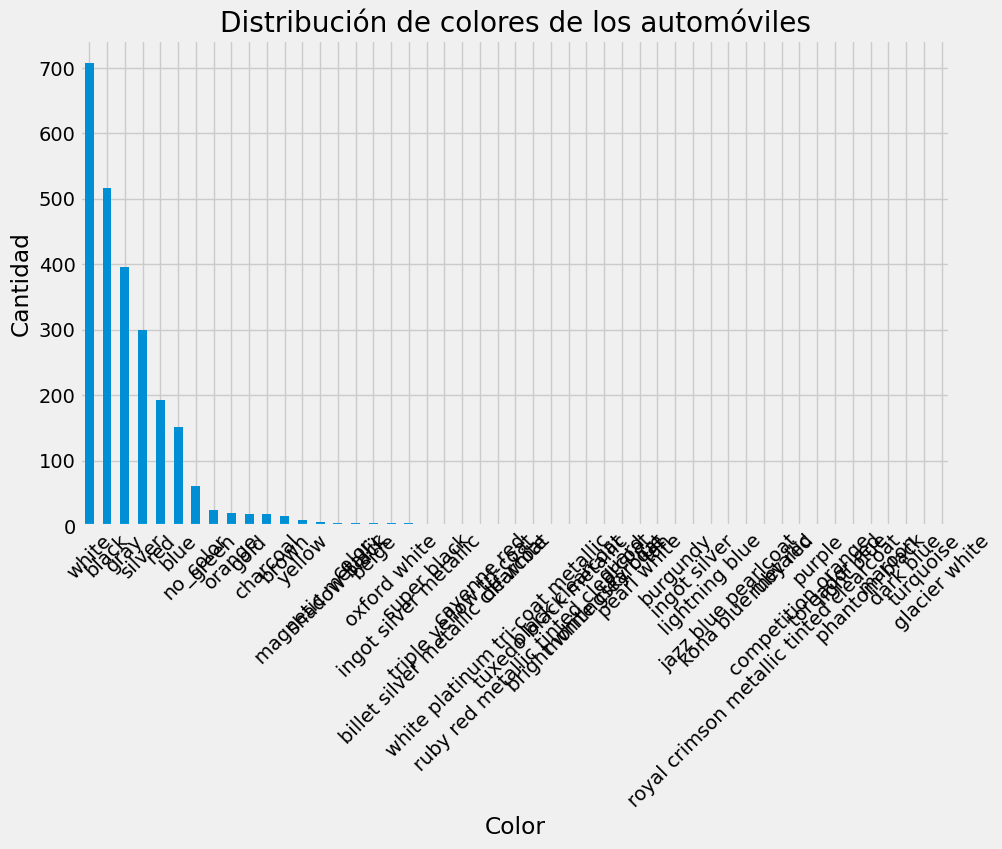

In [ ]:
import matplotlib.pyplot as plt

# Contar la cantidad de automóviles por color
color_counts = data_frame1['color'].value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
color_counts.plot(kind='bar')
plt.title('Distribución de colores de los automóviles')
plt.xlabel('Color')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.show()


Este gráfico de barras muestra la distribución de los colores de los automóviles en el conjunto de datos, lo que puede ayudar a identificar los colores más comunes.

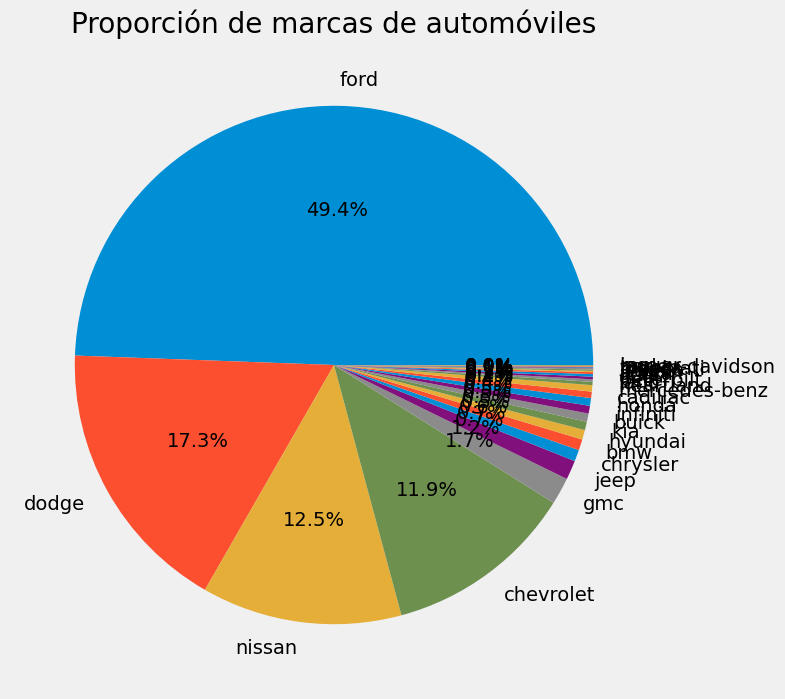

In [ ]:
# Contar la cantidad de automóviles por marca
marca_counts = data_frame1['brand'].value_counts()

# Crear el gráfico de pastel
plt.figure(figsize=(8, 8))
plt.pie(marca_counts, labels=marca_counts.index, autopct='%1.1f%%')
plt.title('Proporción de marcas de automóviles')
plt.show()


Este gráfico de pastel muestra la proporción de las diferentes marcas de automóviles en el conjunto de datos, lo que puede ayudar a identificar las marcas más representadas.

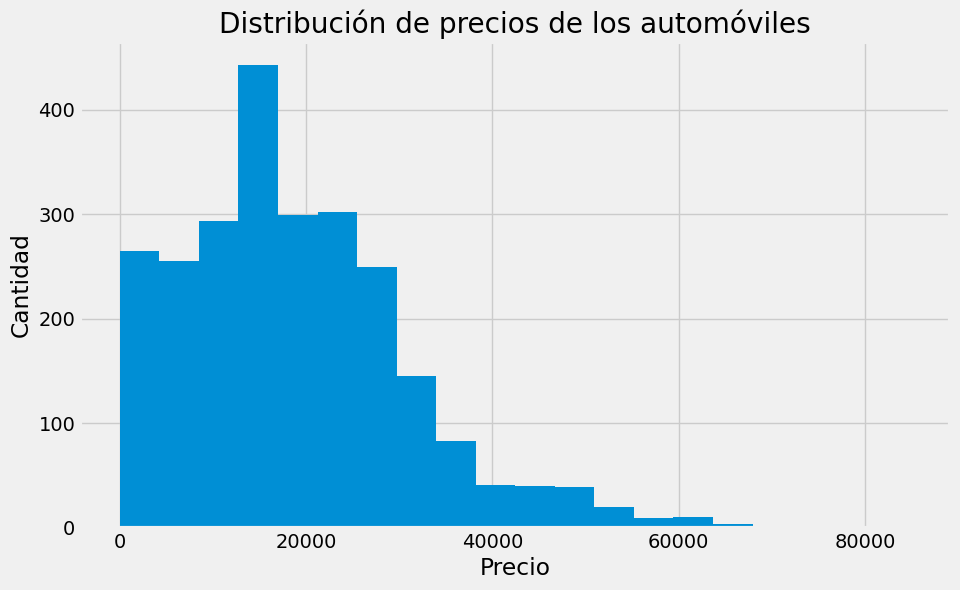

In [ ]:
# Crear el histograma
plt.figure(figsize=(10, 6))
plt.hist(data_frame1['price'], bins=20)
plt.title('Distribución de precios de los automóviles')
plt.xlabel('Precio')
plt.ylabel('Cantidad')
plt.show()


Este histograma muestra la distribución de los precios de los automóviles en el conjunto de datos, lo que puede ayudar a identificar la tendencia predominante en los precios.

In [ ]:
pd.unique(data_frame1['brand'])

array(['toyota', 'ford', 'dodge', 'chevrolet', 'gmc', 'chrysler', 'kia',
       'buick', 'infiniti', 'mercedes-benz', 'jeep', 'bmw', 'cadillac',
       'hyundai', 'mazda', 'honda', 'heartland', 'jaguar', 'acura',
       'harley-davidson', 'audi', 'lincoln', 'lexus', 'nissan', 'land',
       'maserati', 'peterbilt', 'ram'], dtype=object)

In [ ]:
group_company = data_frame1.groupby('country')
group_company.describe()

price                                                         \
          count          mean           std      min      25%      50%   
country                                                                  
 canada     7.0  30357.142857   1180.193689  29500.0  30000.0  30000.0   
 usa     2492.0  18735.116774  12117.360379      0.0  10200.0  16894.0   

                             year               ...   mileage             \
             75%      max   count         mean  ...       75%        max   
country                                         ...                        
 canada  30000.0  33000.0     7.0  2018.857143  ...  52671.50    54309.0   
 usa     25500.0  84900.0  2492.0  2016.708266  ...  63786.75  1017936.0   

            lot                                                          \
          count          mean            std          min           25%   
country                                                                   
 canada     7.0  1.677668e+08      14.915636  167766742.0  1.677667e+08   
 usa     2492.0  1.676912e+08  204124.263026  159348797.0  1.676253e+08   

                                                
                 50%          75%          max  
country                                         
 canada  167766757.0  167766760.5  167766786.0  
 usa     167745031.5  167779858.0  167805500.0  

[2 rows x 40 columns]

In [ ]:
group_company = data_frame1.groupby('brand')
group_company.describe()

price                                                 \
                  count          mean           std      min       25%   
brand                                                                    
acura               3.0   7266.666667   8467.782079   1000.0   2450.00   
audi                4.0  13981.250000  17543.367396      0.0     18.75   
bmw                17.0  26397.058824  18204.851865      0.0  13500.00   
buick              13.0  19715.769231   9349.780712      0.0  13500.00   
cadillac           10.0  24941.000000  12733.425933      0.0  19351.50   
chevrolet         297.0  18669.952862  12195.882280      0.0  10200.00   
chrysler           18.0  13686.111111  10045.160608     25.0   3945.00   
dodge             432.0  17781.988426   9415.887822      0.0  13300.00   
ford             1235.0  21666.888259  12945.547175      0.0  12530.00   
gmc                42.0  10657.380952   8855.767532      0.0   5540.00   
harley-davidson     1.0  54680.000000           NaN  54680.0  54680.00   
heartland           5.0   2966.000000   2524.971287      0.0   1880.00   
honda              12.0   6127.500000   4078.634185      0.0   3945.00   
hyundai            15.0   5203.200000   1974.844486   3250.0   3860.00   
infiniti           12.0  13098.333333   2792.827936  10050.0  10330.00   
jaguar              1.0   2800.000000           NaN   2800.0   2800.00   
jeep               30.0  10933.833333   5689.243887     25.0   6630.00   
kia                13.0  11123.846154   6792.132138      0.0   5200.00   
land                4.0  28900.000000  12003.610568  22500.0  22875.00   
lexus               2.0  33220.000000  31650.099526  10840.0  22030.00   
lincoln             2.0  18150.000000  25667.976157      0.0   9075.00   
maserati            1.0  30300.000000           NaN  30300.0  30300.00   
mazda               2.0   8000.000000  11313.708499      0.0   4000.00   
mercedes-benz      10.0  28704.000000  21468.481911  10740.0  16925.00   
nissan            312.0  12065.820513   6088.236961    375.0   8000.00   
peterbilt           4.0    400.000000    464.130011      0.0     75.00   
ram                 1.0  11050.000000           NaN  11050.0  11050.00   
toyota              1.0   6300.000000           NaN   6300.0   6300.00   

                                               year               ...  \
                     50%       75%      max   count         mean  ...   
brand                                                             ...   
acura             3900.0  10400.00  16900.0     3.0  2010.333333  ...   
audi              9762.5  23725.00  36400.0     4.0  2011.250000  ...   
bmw              29400.0  39000.00  61200.0    17.0  2014.470588  ...   
buick            20105.0  26400.00  37500.0    13.0  2016.000000  ...   
cadillac         24052.5  31275.25  47500.0    10.0  2014.900000  ...   
chevrolet        17100.0  27300.00  63200.0   297.0  2015.616162  ...   
chrysler         18400.0  19575.00  29100.0    18.0  2014.777778  ...   
dodge            16900.0  22700.00  67000.0   432.0  2017.291667  ...   
ford             22000.0  28500.00  74000.0  1235.0  2016.762753  ...   
gmc              10585.0  12710.00  48500.0    42.0  2014.904762  ...   
harley-davidson  54680.0  54680.00  54680.0     1.0  2016.000000  ...   
heartland         2220.0   4050.00   6680.0     5.0  2012.000000  ...   
honda             5790.0   6910.00  17200.0    12.0  2014.333333  ...   
hyundai           4690.0   5674.00   9800.0    15.0  2017.400000  ...   
infiniti         13915.0  14860.00  18500.0    12.0  2018.750000  ...   
jaguar            2800.0   2800.00   2800.0     1.0  2019.000000  ...   
jeep             11015.0  15875.00  21100.0    30.0  2017.400000  ...   
kia              13000.0  14000.00  21500.0    13.0  2016.461538  ...   
land             23100.0  29125.00  46900.0     4.0  2018.000000  ...   
lexus            33220.0  44410.00  55600.0     2.0  2018.500000  ...   
lincoln          18150.0  27225.00  36300.0 

In [ ]:
#descriptivos basicos de los datos
data_frame1.describe()

,price,year,title_status,mileage,lot
count,2499.000000,2499.000000,2499.000000,2.499000e+03,2.499000e+03
mean,18767.671469,2016.714286,0.065226,5.229869e+04,1.676914e+08
std,12116.094936,3.442656,0.246974,5.970552e+04,2.038772e+05
min,0.000000,1973.000000,0.000000,0.000000e+00,1.593488e+08
25%,10200.000000,2016.000000,0.000000,2.146650e+04,1.676253e+08
50%,16900.000000,2018.000000,0.000000,3.536500e+04,1.677451e+08
75%,25555.500000,2019.000000,0.000000,6.347250e+04,1.677798e+08
max,84900.000000,2020.000000,1.000000,1.017936e+06,1.678055e+08


In [ ]:
# Descriptivos Básicos por Tipo de Variable:

print('Mínimo:',data_frame1['price'].min())
print('Máximo:',data_frame1['price'].max())
print('Promedio:',data_frame1['price'].mean())
print('STD:',data_frame1['price'].std())
print(data_frame1.price.quantile([.25, .5, .75]))
print('*******')
print('Mínimo:',min(data_frame1['price']))
print('Máximo:',max(data_frame1['price']))

Mínimo: 0
Máximo: 84900
Promedio: 18767.671468587436
STD: 12116.09493565076
0.25    10200.0
0.50    16900.0
0.75    25555.5
Name: price, dtype: float64
*******
Mínimo: 0
Máximo: 84900


In [ ]:
#considerandi solamente las variable object
data_frame1.describe(include=[object])

,brand,model,color,vin,state,country,condition
count,2499,2499,2499,2499,2499,2499,2499
unique,28,127,49,2495,44,2,47
top,ford,door,white,1gnevhkw8jj148388,pennsylvania,usa,2 days left
freq,1235,651,707,2,299,2492,832


In [ ]:
# Transformación de Variables Categóricas en Numéricas:

from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
data_frame["title_status"] = lb_make.fit_transform(data_frame["title_status"])
data_frame[["title_status"]].head(10)

,title_status
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [ ]:
data_frame[["title_status"]].describe()

,title_status
count,2499.000000
mean,0.065226
std,0.246974
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [ ]:
data_frame

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,0,6300,toyota,cruiser,2008,0,274117.0,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,1,2899,ford,se,2011,0,190552.0,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,2,5350,dodge,mpv,2018,0,39590.0,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,3,25000,ford,door,2014,0,64146.0,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,4,27700,chevrolet,1500,2018,0,6654.0,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2494,2494,7800,nissan,versa,2019,0,23609.0,red,3n1cn7ap9kl880319,167722715,california,usa,1 days left
2495,2495,9200,nissan,versa,2018,0,34553.0,silver,3n1cn7ap5jl884088,167762225,florida,usa,21 hours left
2496,2496,9200,nissan,versa,2018,0,31594.0,silver,3n1cn7ap9jl884191,167762226,florida,usa,21 hours left
2497,2497,9200,nissan,versa,2018,0,32557.0,black,3n1cn7ap3jl883263,167762227,florida,usa,2 days left


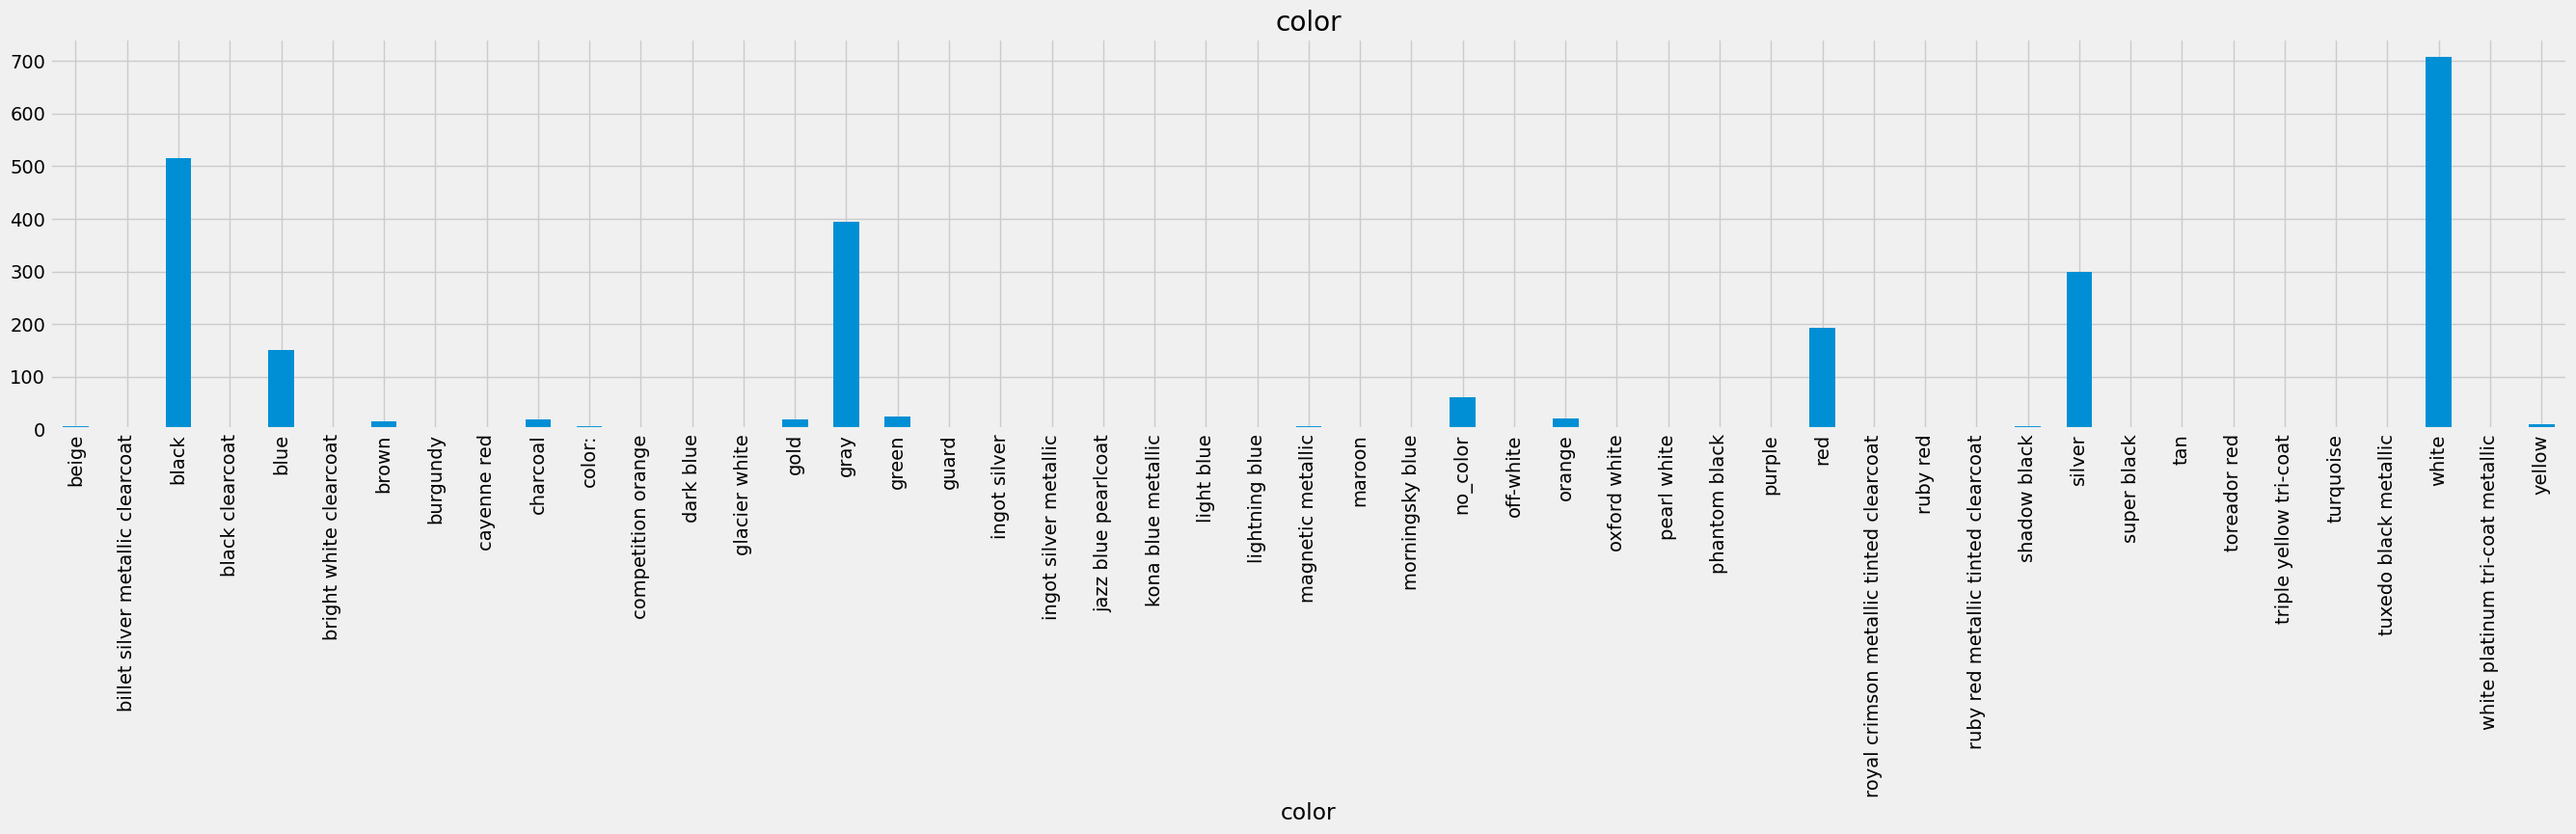

In [ ]:
#graficas de distribucion de variables categoricas
data_frame.groupby('color').size().plot(kind='bar', figsize = (30, 5))
plt.title('color')
plt.show()

In [ ]:
# que años de auto estan ubicados por estado?

result = data_frame.groupby('year')['state'].max()
result

year
1973      pennsylvania
1984          arkansas
1993          colorado
1994           georgia
1995           arizona
1996          oklahoma
1997         wisconsin
1998             texas
1999           florida
2000          virginia
2001         wisconsin
2002    south carolina
2003         wisconsin
2004           wyoming
2005         wisconsin
2006         wisconsin
2007          virginia
2008              utah
2009              utah
2010      pennsylvania
2011        washington
2012         wisconsin
2013         wisconsin
2014         wisconsin
2015         wisconsin
2016         wisconsin
2017         wisconsin
2018         wisconsin
2019         wisconsin
2020          virginia
Name: state, dtype: object

In [ ]:
# en que estado se ven los autos por color?
result = data_frame.groupby('state')['color'].max()
result

state
alabama                                      white
arizona                                      white
arkansas                                     white
california                                  yellow
colorado                                     white
connecticut                                  white
florida                                     yellow
georgia                                      white
idaho                                        white
illinois                                    yellow
indiana                                      white
kansas                                      silver
kentucky                                     white
louisiana                                    white
maryland                                     white
massachusetts                tuxedo black metallic
michigan                                    yellow
minnesota                                   yellow
mississippi                                  white
missouri                 

In [ ]:
# verificar el precio mediante la condicion del auto
result = data_frame.groupby('price')['condition'].max()
result

price
0          9 days left
25         8 days left
50       18 hours left
75       17 hours left
100      17 hours left
             ...      
65500    21 hours left
67000    21 hours left
70000      2 days left
74000      2 days left
84900      2 days left
Name: condition, Length: 790, dtype: object

In [ ]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2499 entries, 0 to 2498
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    2499 non-null   int64 
 1   price         2499 non-null   int64 
 2   brand         2499 non-null   object
 3   model         2499 non-null   object
 4   year          2499 non-null   int64 
 5   title_status  2499 non-null   int64 
 6   mileage       2499 non-null   object
 7   color         2499 non-null   object
 8   vin           2499 non-null   object
 9   lot           2499 non-null   int64 
 10  state         2499 non-null   object
 11  country       2499 non-null   object
 12  condition     2499 non-null   object
dtypes: int64(5), object(8)
memory usage: 253.9+ KB


In [ ]:
print(data_frame.groupby('year').size())

year
1973      1
1984      1
1993      1
1994      2
1995      1
1996      2
1997      2
1998      4
1999      1
2000      4
2001      5
2002      2
2003      9
2004      6
2005      6
2006      8
2007      6
2008     18
2009     11
2010     13
2011     23
2012     72
2013     86
2014    104
2015    196
2016    203
2017    377
2018    395
2019    892
2020     48
dtype: int64


In [ ]:
# DEFINICIÓN VALORES ÚNICOS

for feature in data_frame.columns:
    print('Valores únicos de', feature, '=', data_frame[feature].unique())

Valores únicos de Unnamed: 0 = [   0    1    2 ... 2496 2497 2498]
Valores únicos de price = [ 6300  2899  5350 25000 27700  5700  7300 13350 14600  5250 10400 12920
 31900  5430 20700 12710  5200 16500  5210 38100 12520 15000  6180 20800
 11900 21500 12000  4190 13000 18500 29800  5330 16600 19200  7320  7000
 30500  6330 55000 16200 19000  5580 54000 16000 27000  7760 19600 20000
 18100 23000 13490 17800  6650 29100 21100 18600  4340 19300 12780 15800
 29400  4430 19400 15900 26400  4140 18300 17900  4640 24000 13200 18000
 14900 11500  9110  7350 24500  9300 39800 53500 15110 34000 26502  5990
 13600 23605 10780 13800 25201  7070  8700 18003  8530 23100 17000 34002
  6980 20802  9200 26500 24802 28500 47500 23500 23505 10940 32100 53000
  6830 26414  4160 19405  5690 25900 24005  5090 19500 32012  6800  4260
     0 31802  7210 28402 33300  6700  6440 19900 37000  4040 22300 31200
  4290 22800 19002 39000  6060 28800 40000  6140 21000 20105  6760 25800
  5470 24502  7900 27305 15290 

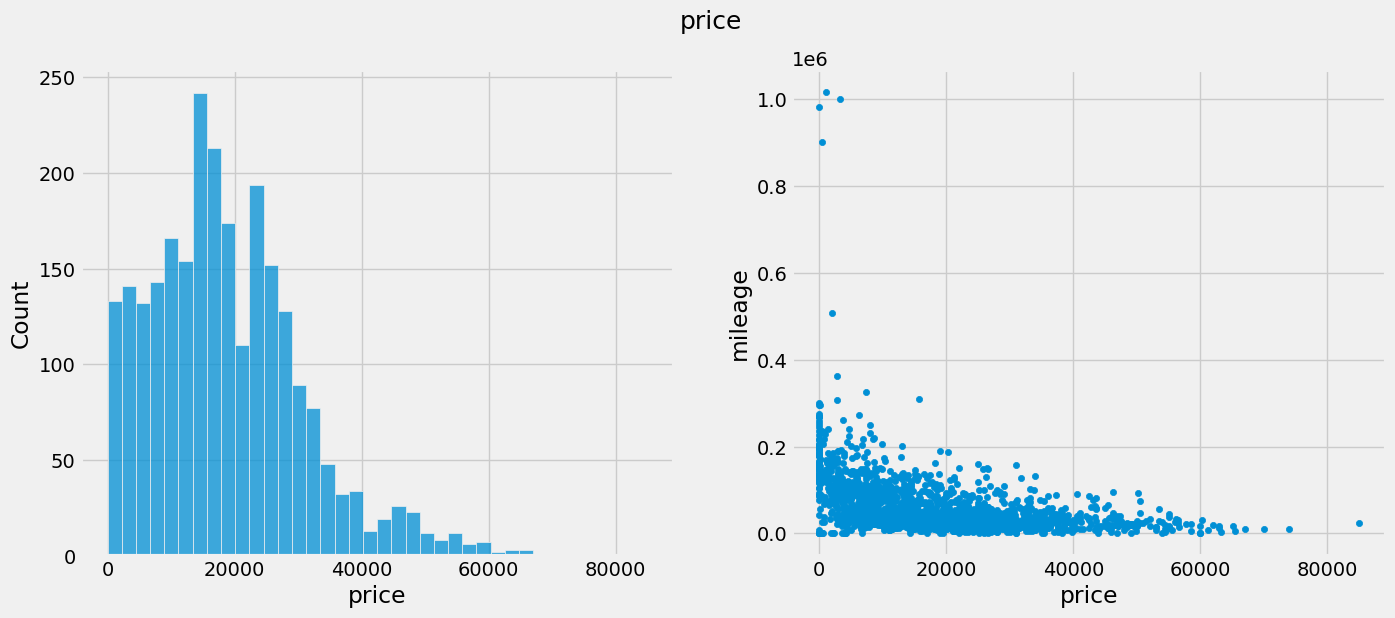

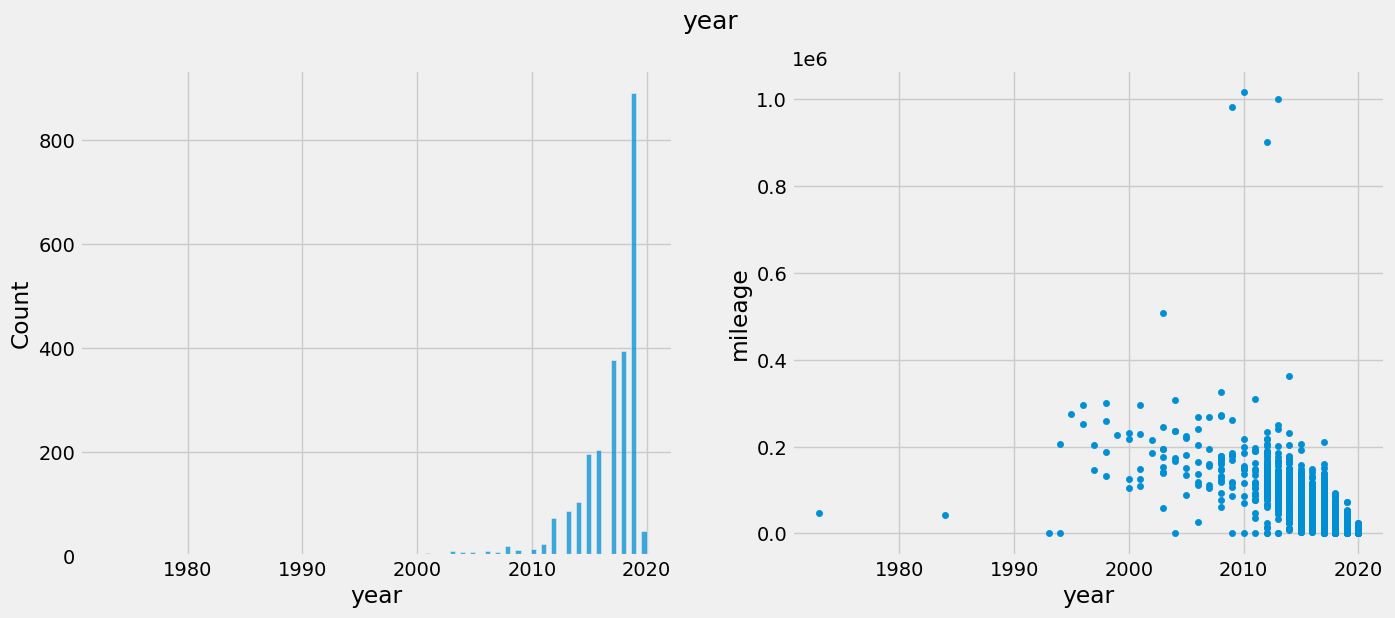

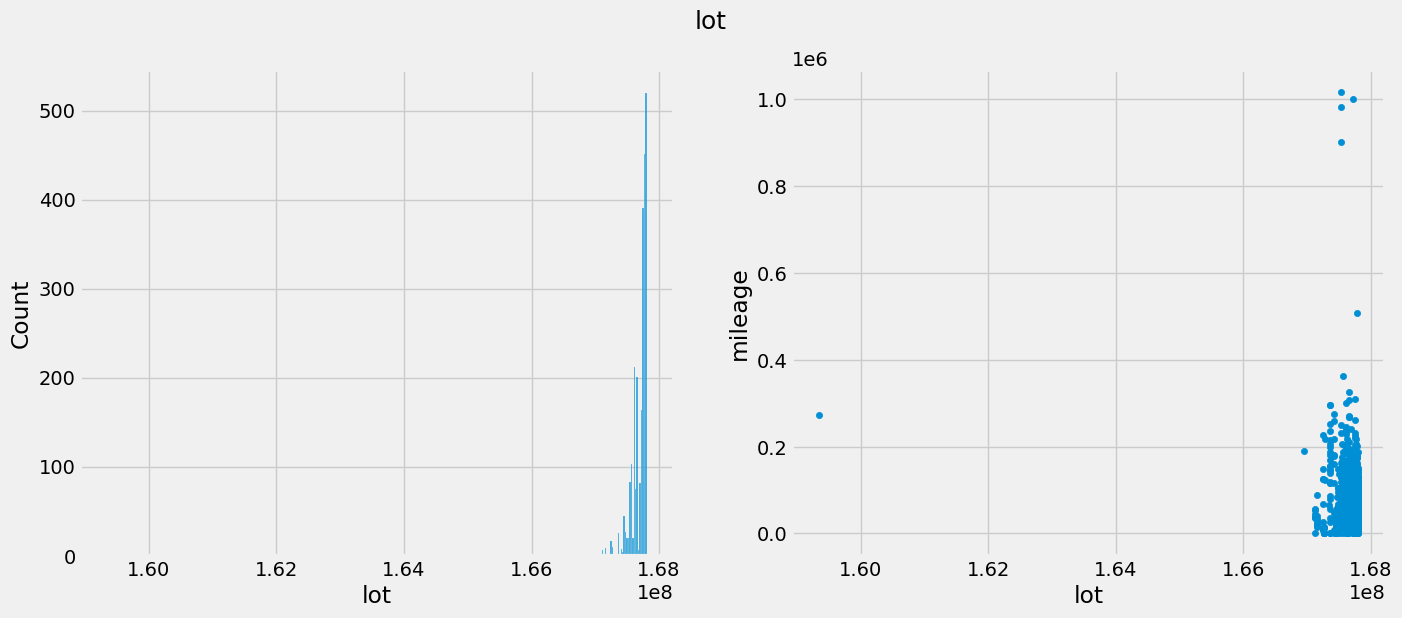

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Eliminar comas y convertir a tipo numérico (con NaN para valores no válidos)
data_frame['mileage'] = pd.to_numeric(data_frame['mileage'].str.replace(',', ''), errors='coerce')

# Luego, puedes utilizar la columna 'mileage' en el gráfico de dispersión
for col in ['price', 'year', 'lot']:
    fig, ax = plt.subplots(1, 2, figsize=(15, 6))
    fig.suptitle(col, fontsize=18)
    sns.histplot(data_frame[col], ax=ax[0])
    data_frame[[col] + ['mileage']].plot.scatter(x=col, y='mileage', ax=ax[1])

plt.show()

###**Algoritmo Regresión Lineal**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Cargar el conjunto de datos
data = data_frame
# Seleccionar las características y la variable objetivo
X = data[['year', 'mileage', 'color', 'state']]
y = data['price']

# Convertir variables categóricas en variables numéricas
X = pd.get_dummies(X)

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear una instancia del modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo utilizando los datos de entrenamiento
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el rendimiento del modelo utilizando el error cuadrático medio (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Error cuadrático medio (MSE):", mse)


Error cuadrático medio (MSE): 103653715.63337237


En este ejemplo, hemos seleccionado las características 'year', 'mileage', 'color' y 'state' como variables predictoras y la variable 'price' como la variable objetivo. Dado que algunas características son categóricas, hemos utilizado pd.get_dummies() para convertirlas en variables numéricas.

Dividimos el conjunto de datos en conjuntos de entrenamiento y prueba, creamos una instancia del modelo de regresión lineal, lo entrenamos con los datos de entrenamiento y realizamos predicciones en el conjunto de prueba. Finalmente, evaluamos el rendimiento del modelo utilizando el error cuadrático medio (MSE).

###**Algoritmo Random Forest**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Cargar el conjunto de datos
data = data_frame

# Seleccionar las características y la variable objetivo
X = data[['year', 'mileage', 'color', 'state']]
y = data['price']

# Convertir variables categóricas en variables numéricas
X = pd.get_dummies(X)

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear una instancia del modelo Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Entrenar el modelo utilizando los datos de entrenamiento
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el rendimiento del modelo utilizando el error cuadrático medio (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Error cuadrático medio (MSE):", mse)


Error cuadrático medio (MSE): 95162560.4858854


En este ejemplo, hemos utilizado el algoritmo Random Forest mediante la clase RandomForestRegressor de la biblioteca Scikit-learn. Al igual que en el ejemplo anterior, seleccionamos las características 'year', 'mileage', 'color' y 'state' como variables predictoras y la variable 'price' como la variable objetivo. Convertimos las variables categóricas en variables numéricas utilizando pd.get_dummies().

Luego, dividimos el conjunto de datos en conjuntos de entrenamiento y prueba, creamos una instancia del modelo Random Forest con 100 árboles (n_estimators=100) y lo entrenamos con los datos de entrenamiento mediante el método fit. Realizamos predicciones en el conjunto de prueba utilizando el método predict y evaluamos el rendimiento del modelo utilizando el error cuadrático medio (MSE).

###**Tabla de comparacion de los algoritmos**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Cargar el conjunto de datos
data = data_frame

# Seleccionar las características y la variable objetivo
X = data[['year', 'mileage', 'color', 'state']]
y = data['price']

# Convertir variables categóricas en variables numéricas
X = pd.get_dummies(X)

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo de regresión lineal
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

# Entrenar el modelo Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Calcular las métricas para el modelo de regresión lineal
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

# Calcular las métricas para el modelo Random Forest
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Crear la tabla de comparación de rendimientos
data = {'Algoritmo': ['Regresión Lineal', 'Random Forest'],
        'MSE': [mse_linear, mse_rf],
        'R^2': [r2_linear, r2_rf]}

df = pd.DataFrame(data)
print(df)


          Algoritmo           MSE       R^2
0  Regresión Lineal  1.036537e+08  0.346005
1     Random Forest  9.516256e+07  0.399579


El MSE del Random Forest (9.516e+07) es ligeramente más bajo que el de la regresión lineal (1.036e+08), lo que indica que las predicciones del Random Forest tienen un menor error promedio cuadrático en comparación con la regresión lineal. Sin embargo, la diferencia en el MSE entre los dos algoritmos no es significativamente grande.

En cuanto al R^2, tanto la regresión lineal (0.346) como el Random Forest (0.400) han logrado explicar una proporción mayor de la variabilidad en el precio de los automóviles en comparación con los resultados anteriores. El Random Forest muestra un R^2 ligeramente más alto, lo que indica un mejor ajuste del modelo a los datos en comparación con la regresión lineal.

El algoritmo Random Forest sigue mostrando un rendimiento ligeramente mejor en comparación con la regresión lineal para la predicción del precio de los automóviles en el conjunto de datos "USA CERS Dataset". Sin embargo, es importante tener en cuenta que el rendimiento de los modelos puede depender de varios factores, como la selección de características, el ajuste de hiperparámetros y el tamaño del conjunto de datos. Por lo tanto, es recomendable realizar un análisis más exhaustivo y ajustar los modelos según sea necesario para obtener el mejor rendimiento posible.